In [33]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = ""

loss_value = 4  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 50
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mode

In [34]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [35]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss, all_test_acc = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    # print(all_log_rn)
    # print(all_test_acc)

    all_log_rn_list = [val for sublist in all_log_rn for val in sublist]
    all_test_acc_list = [val for sublist in all_test_acc for val in sublist]
    all_test_loss_list = [val for sublist in all_test_loss for val in sublist]

    print(all_log_rn_list)
    print(all_test_acc_list)
    print(all_test_loss_list)


Processing data modification folder: data_2000
[-inf, -inf, -inf, -inf, -inf, 11562.325385983244, 11469.952389266711, -inf, -inf, 11839.00526860423, -inf, -inf, -inf, -inf, -inf, -inf, 12381.267256784144, -inf, -inf, -inf, -inf, 9048.186621204406, -inf, -inf, 11231.063347686375, -inf, -inf, -inf, -inf, -inf, 14060.359224788945, -inf, 11757.225868054922, 10106.080200674887, -inf, 11924.870084561097, -inf, -inf, -inf, 6497.682640523334, -inf, 12187.123648558898, 11601.721391177478, -inf, -inf, 7227.102396474562, -inf, -inf, -inf, -inf]
[0.72525, 0.79025, 0.74125, 0.72525, 0.7555, 0.81875, 0.78925, 0.70925, 0.69325, 0.74275, 0.70375, 0.69975, 0.71725, 0.76375, 0.7035, 0.73725, 0.75425, 0.74575, 0.72475, 0.721, 0.7045, 0.7435, 0.712, 0.7225, 0.7625, 0.67775, 0.69275, 0.73875, 0.66275, 0.727, 0.72825, 0.81475, 0.72975, 0.77, 0.74075, 0.7715, 0.74175, 0.73925, 0.6775, 0.7255, 0.66025, 0.7525, 0.78575, 0.757, 0.675, 0.768, 0.6715, 0.7725, 0.723, 0.741]
[4.541808344610035, 4.134291388117708, 

Collected results for 50 experiments
Model_0: first exceedance at index 651 (value=4.017621040344238, threshold=4)
Appended cutoff for model_40_data_10 | target=0, cutoff_idx=651
Model_0: first exceedance at index 735 (value=4.0352864265441895, threshold=4)
Appended cutoff for model_0_data_10 | target=0, cutoff_idx=735
Model_0: first exceedance at index 184 (value=4.055840969085693, threshold=4)
Appended cutoff for model_22_data_10 | target=0, cutoff_idx=184
Model_0: first exceedance at index 145 (value=4.008944511413574, threshold=4)
Appended cutoff for model_32_data_10 | target=0, cutoff_idx=145
Model_0: first exceedance at index 867 (value=4.006897449493408, threshold=4)
Appended cutoff for model_14_data_10 | target=0, cutoff_idx=867
⚠️ Skipped model_49_data_10 (target=0): Model_0: loss curve never exceeds threshold=4
⚠️ Skipped model_9_data_10 (target=0): Model_0: loss curve never exceeds threshold=4
Model_0: first exceedance at index 186 (value=4.0116167068481445, threshold=4)
App

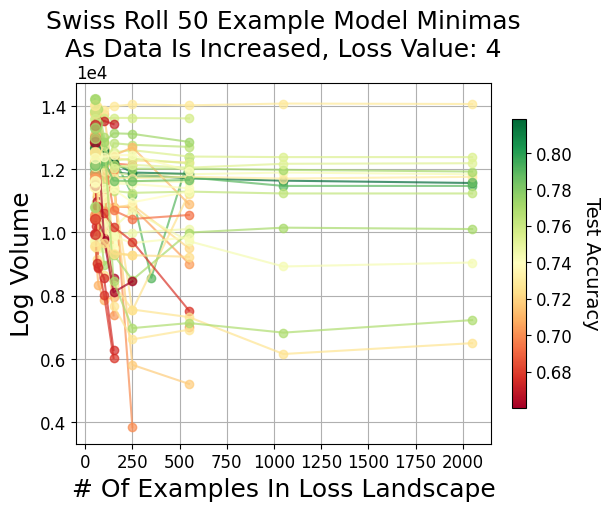

In [36]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")

found_minima_vol, found_minima_dataset = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],        
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    suptitle=f"{problem_name}",
    title=f"Swiss Roll 50 Example Model Minimas\nAs Data Is Increased, Loss Value: {loss_value}",
    log_scale = data_level_log,
    alpha=0.7,
    plot_average=False,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=18, ylabel_size=18, title_size=18, suptitle_size=18, legend_size=14, legend_title_fontsize=14,
    plot_accuracy_colors=True,
)